In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kanth\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('vgsales.csv')

print(data)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
data.shape

(16598, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
data = data.dropna(subset=['Year', 'Publisher'])


In [10]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
data_duplicates = data.duplicated().any()
print(data_duplicates)

False


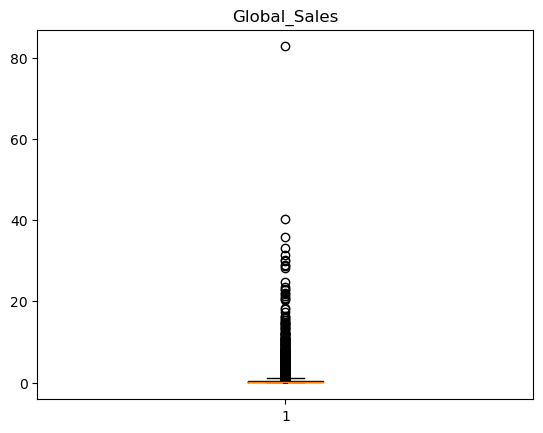

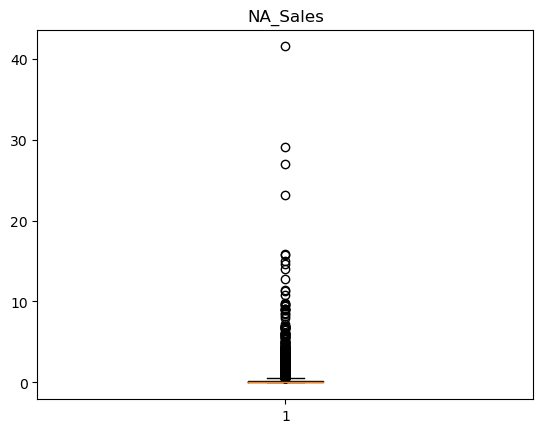

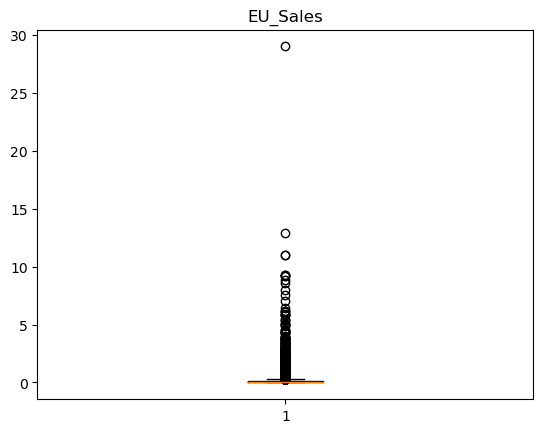

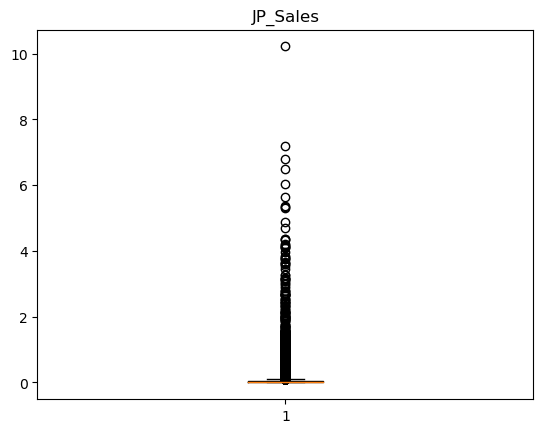

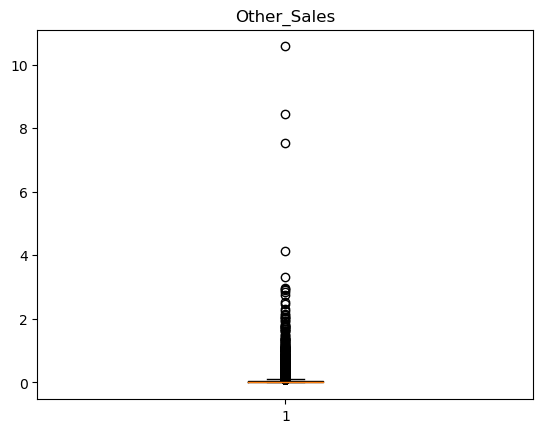

In [12]:
numerical_columns = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
for column in numerical_columns:
    plt.boxplot(x=data[column])
    plt.title(column)
    plt.show()


In [13]:
numerical_columns =['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
for column in numerical_columns:
    print(column, ":")
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    upper_tail = q3+1.5*iqr
    lower_tail = q1-1.5*iqr
    
    print("q1 --->", q1)
    print("q3 --->", q3)
    print("iqr --->",iqr)
    print("uppertail --->", upper_tail)
    print("lowertail --->", lower_tail)
    print("_"*50)

Global_Sales :
q1 ---> 0.06
q3 ---> 0.48
iqr ---> 0.42
uppertail ---> 1.1099999999999999
lowertail ---> -0.5700000000000001
__________________________________________________
NA_Sales :
q1 ---> 0.0
q3 ---> 0.24
iqr ---> 0.24
uppertail ---> 0.6
lowertail ---> -0.36
__________________________________________________
EU_Sales :
q1 ---> 0.0
q3 ---> 0.11
iqr ---> 0.11
uppertail ---> 0.275
lowertail ---> -0.165
__________________________________________________
JP_Sales :
q1 ---> 0.0
q3 ---> 0.04
iqr ---> 0.04
uppertail ---> 0.1
lowertail ---> -0.06
__________________________________________________
Other_Sales :
q1 ---> 0.0
q3 ---> 0.04
iqr ---> 0.04
uppertail ---> 0.1
lowertail ---> -0.06
__________________________________________________


In [14]:
from scipy.stats import skew
skew_data = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']

for num_column in skew_data:
    print(num_column,"---->" ,skew (data[num_column]))  

Global_Sales ----> 17.30271833337404
NA_Sales ----> 18.739187192468687
EU_Sales ----> 18.77306742459949
JP_Sales ----> 11.123189283524262
Other_Sales ----> 24.100390181995717


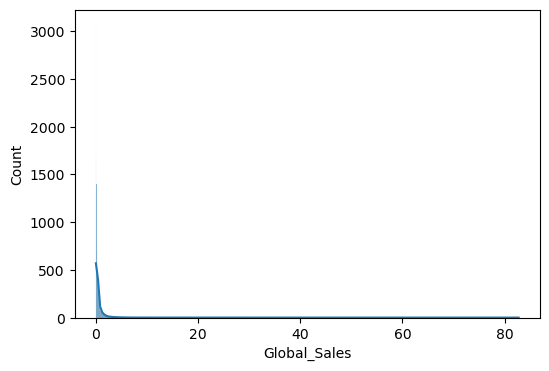

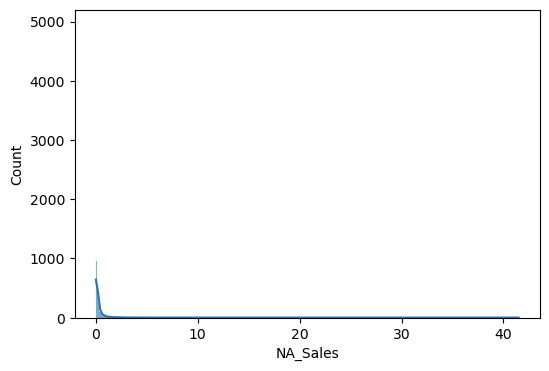

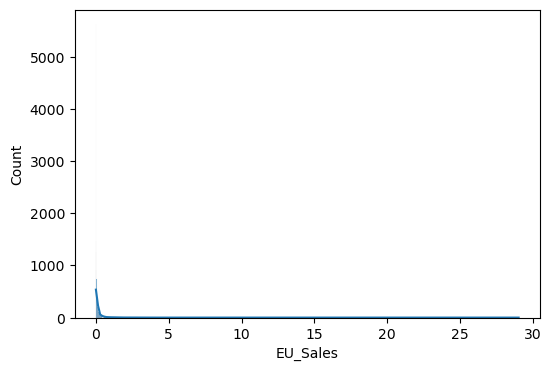

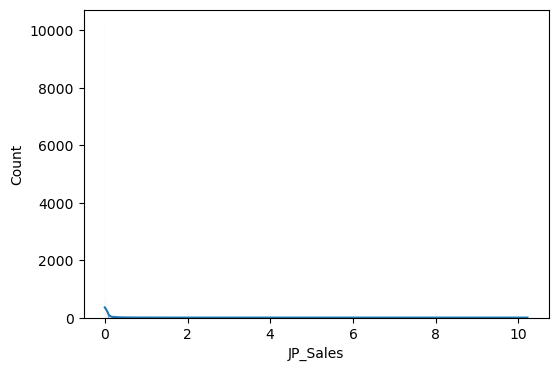

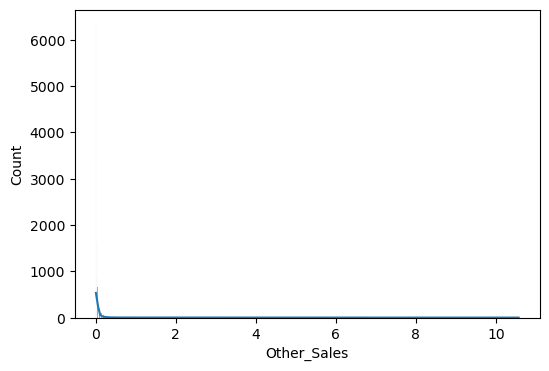

In [15]:
for num_column in skew_data:
    plt.figure(figsize=(6,4))
    sns.histplot(data[num_column],kde = True)
    plt.show()

In [16]:
for num_column in skew_data:
    data[num_column] = np.sqrt (data[num_column])

In [17]:
for num_column in skew_data:
    print(num_column,"--->",skew(data[num_column]))

Global_Sales ---> 3.3196428991638443
NA_Sales ---> 2.6974427236910032
EU_Sales ---> 2.8987909195167156
JP_Sales ---> 3.2232512614377176
Other_Sales ---> 3.288015080883035


In [18]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,6.441273,5.387021,1.941649,2.908608,9.096153
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,5.392588,1.892089,2.609598,0.877496,6.343501
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.981206,3.588872,1.946792,1.819341,5.984981
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.968627,3.318132,1.811077,1.720465,5.744563
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,3.357082,2.981610,3.196873,1.000000,5.600893
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.100000,0.000000,0.000000,0.000000,0.100000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.100000,0.000000,0.000000,0.000000,0.100000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.000000,0.000000,0.000000,0.000000,0.100000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.000000,0.100000,0.000000,0.000000,0.100000


In [19]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,6.441273,5.387021,1.941649,2.908608,9.096153
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,5.392588,1.892089,2.609598,0.877496,6.343501
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.981206,3.588872,1.946792,1.819341,5.984981
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.968627,3.318132,1.811077,1.720465,5.744563
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,3.357082,2.981610,3.196873,1.000000,5.600893


In [20]:
data.to_csv('Cleaned_vgsales.csv', index=False)
print("Cleaned data exported to 'Cleaned_vgsales.csv'")

Cleaned data exported to 'Cleaned_vgsales.csv'
